In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

#Para estilar las tablas e importar el xlsx
#!pip install jinja2
#!pip install openpyxl

# 1. Dataset Exploration
### What information does each column contain?

Para comenzar a explorar los datos usamos los métodos: `sample()` e `info()`. El primero nos mostrará una muestra aleatoria de entradas en el dataset, el segundo una información general sobre tipos de datos, columnas, numero de entradas y valores nulos.

In [2]:
df_citibike = pd.read_excel("./ny_citibikes_raw.xlsx")
df_citibike.sample(5)

,Start Time,Stop Time,Start Station ID,Start Station Name,End Station ID,End Station Name,Bike ID,User Type,Birth Year,Age,Age Groups,Trip Duration,Trip_Duration_in_min,Month,Season,Temperature,Weekday
18453,2017-03-26 10:50:00,2017-03-26 10:57:00,3213,Van Vorst Park,3184,Paulus Hook,26294,Subscriber,1982,39,35-44,460,8,3,Spring,16,Sunday
7622,2017-02-16 11:54:00,2017-02-16 11:57:00,3195,Sip Ave,3194,McGinley Square,26258,Subscriber,1994,27,25-34,181,3,2,Winter,15,Thursday
16043,2017-03-20 07:45:00,2017-03-20 07:49:00,3212,Christ Hospital,3209,Brunswick St,26190,Subscriber,1987,34,25-34,241,4,3,Spring,16,Monday
19758,2017-03-29 21:23:00,2017-03-29 21:28:00,3187,Warren St,3267,Morris Canal,29249,Subscriber,1980,41,35-44,319,5,3,Spring,19,Wednesday
11680,2017-03-02 17:37:00,2017-03-02 17:39:00,3185,City Hall,3186,Grove St PATH,26207,Subscriber,1957,64,55-64,99,2,3,Spring,17,Thursday


In [3]:
df_citibike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20400 entries, 0 to 20399
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Start Time            20400 non-null  datetime64[ns]
 1   Stop Time             20400 non-null  datetime64[ns]
 2   Start Station ID      20400 non-null  int64         
 3   Start Station Name    20400 non-null  object        
 4   End Station ID        20400 non-null  int64         
 5   End Station Name      20399 non-null  object        
 6   Bike ID               20400 non-null  int64         
 7   User Type             20400 non-null  object        
 8   Birth Year            20400 non-null  int64         
 9   Age                   20400 non-null  int64         
 10  Age Groups            20400 non-null  object        
 11  Trip Duration         20400 non-null  int64         
 12  Trip_Duration_in_min  20400 non-null  int64         
 13  Month           

Hemos detectado que hay un valor nulo en la columna "End Station Name". Para visualizarlo más claramente:

In [4]:
df_citibike.isna().sum()

Start Time              0
Stop Time               0
Start Station ID        0
Start Station Name      0
End Station ID          0
End Station Name        1
Bike ID                 0
User Type               0
Birth Year              0
Age                     0
Age Groups              0
Trip Duration           0
Trip_Duration_in_min    0
Month                   0
Season                  0
Temperature             0
Weekday                 0
dtype: int64

Confirmamos que unicamente hay una columna con un valor NA(*not available*). Mostramos la entrada donde falta ese valor.

In [5]:
df_citibike[df_citibike.isna().any(axis=1)]

,Start Time,Stop Time,Start Station ID,Start Station Name,End Station ID,End Station Name,Bike ID,User Type,Birth Year,Age,Age Groups,Trip Duration,Trip_Duration_in_min,Month,Season,Temperature,Weekday
9858,2017-02-25 12:36:00,2017-02-25 12:44:00,3220,5 Corners Library,3211,NaN,24522,Subscriber,1963,58,55-64,532,9,2,Winter,11,Saturday


Por ser un único valor nulo en un conjunto de 20.000 entredas lo desecharemos.

In [6]:
df_citibike.dropna(inplace=True)

Para saber más sobre el contenido de las columnas haremos un `describe()` de las columnas numéricas que consideramos más interesantes(excluimos las fechas principalmente).

In [7]:
df_citibike.loc[:,["Birth Year","Age", "Trip Duration", "Trip_Duration_in_min", "Temperature"]].describe()

,Birth Year,Age,Trip Duration,Trip_Duration_in_min,Temperature
count,20399.000000,20399.000000,20399.000000,20399.000000,20399.000000
mean,1979.320506,41.679494,563.844306,9.398794,14.897838
std,10.090935,10.090935,4011.648987,66.860322,2.398004
min,1931.000000,22.000000,61.000000,1.000000,9.000000
25%,1974.000000,35.000000,221.000000,4.000000,13.000000
50%,1982.000000,39.000000,311.000000,5.000000,15.000000
75%,1986.000000,47.000000,514.000000,9.000000,17.000000
max,1999.000000,90.000000,390893.000000,6515.000000,19.000000


En los máximos de las columnas de duración de los viajes vemos **valores que son demasiado grandes para nuestro contexto.**

In [8]:
df_citibike["Trip_Duration_in_min"].sort_values(ascending=False).head()

17953    6515
14999    3693
7916     2422
2315     2422
2177     1507
Name: Trip_Duration_in_min, dtype: int64

Para eliminar estos outliers usaremos el cuartil 99 cómo dataset.

In [9]:
df_citibike=df_citibike.loc[df_citibike["Trip_Duration_in_min"]<df_citibike["Trip_Duration_in_min"].quantile(.99)]

In [10]:
df_citibike.loc[:,["Birth Year","Age", "Trip Duration", "Trip_Duration_in_min", "Temperature"]].describe()

,Birth Year,Age,Trip Duration,Trip_Duration_in_min,Temperature
count,20179.000000,20179.000000,20179.000000,20179.000000,20179.000000
mean,1979.313742,41.686258,422.782645,7.048020,14.903365
std,10.102323,10.102323,342.498581,5.715764,2.398784
min,1931.000000,22.000000,61.000000,1.000000,9.000000
25%,1974.000000,35.000000,220.000000,4.000000,13.000000
50%,1982.000000,39.000000,309.000000,5.000000,15.000000
75%,1986.000000,47.000000,504.000000,8.000000,17.000000
max,1999.000000,90.000000,2548.000000,42.000000,19.000000


### Are there missing or duplicated values?

A continuación exploraremos si existen duplicados y cuantos. Al ejecutar la siguiente casilla de código veremos que existen 3555 entradas duplicadas. Los eliminaremos quedándonos con unicamente 16845 entradas.

In [11]:
df_citibike.duplicated().sum()

np.int64(3521)

In [12]:
df_citibike.drop_duplicates(inplace=True)
df_citibike.shape

(16658, 17)

### What is the overall time span of the trips?

In [13]:
print(f"Suma total de los tiempos: {df_citibike.loc[:,"Trip_Duration_in_min"].sum()} minutos.")

Suma total de los tiempos: 117415 minutos.


# 2. Basic Statistics
### What is the average trip duration (in minutes)? And the minimum and maximum duration?

In [14]:
df_citibike.loc[:,"Trip_Duration_in_min"].agg(["mean","max", "min"]).to_frame()

,Trip_Duration_in_min
mean,7.048565
max,42.000000
min,1.000000


### What are the most common start and end stations?

In [15]:
df_citibike.value_counts("Start Station Name").head(1).to_frame()

,count
Start Station Name,
Grove St PATH,2098


In [16]:
df_citibike.value_counts("End Station Name").head(1).to_frame()

,count
End Station Name,
Grove St PATH,2730


# 3. Users and Demographics
### How many unique bikes were used?

Una forma de muchas para optener el numero de bicicletas es usando la función `unique` sobre la columna `Bike ID` y despues contar cuantos valores únicos existen accediendo al atributo `size` del array numpy.

In [17]:
df_citibike.loc[:, "Bike ID"].unique().size

500

### What are the proportions of user types (Subscriber vs Customer)?
Para obtener el porcentaje normalizamos y multiplicamos por cien.

In [18]:
df_citibike.value_counts("User Type", normalize=True).mul(100).to_frame()

,proportion
User Type,
Subscriber,98.463201
One-time user,1.536799


### What is the age distribution of the users? Which age group uses the service the most?
La mayoría de usuarios son personas **mayores de 30 años y menores de 50**. El grupo de edad que más utiliza el servicio de bicicletas es el de 30 a 40 años, casi el 50%.

In [19]:
df_por_edad=pd.cut(df_citibike["Age"], bins=np.arange(0,100,11)).value_counts(normalize=True).mul(100).sort_index()
df_por_edad.sort_values(ascending=False).head(1).to_frame()

,proportion
Age,
"(33, 44]",49.34566


<Axes: title={'center': 'Distribución por edad'}, xlabel='Edad', ylabel='Frecuencia'>

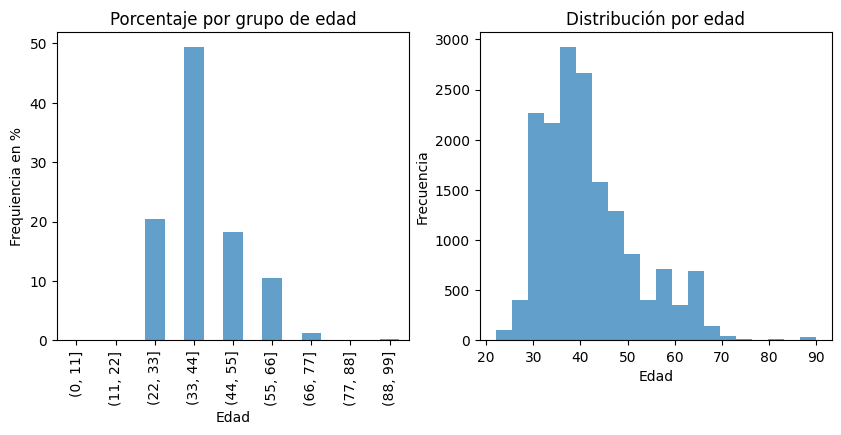

In [20]:
fig,axs = plt.subplots(1,2, figsize=(10,4))
df_por_edad.plot.bar(ax=axs[0], alpha=0.7, xlabel="Edad", ylabel="Frequiencia en %", title="Porcentaje por grupo de edad")
df_citibike["Age"].plot.hist(ax=axs[1], bins=20, title="Distribución por edad", xlabel="Edad", ylabel="Frecuencia", alpha=0.7)

# 4. Temporal Analysis
  - How does the number of trips vary by weekday?
  - Which month or season has the most rides?
  - What time of day do most trips start?

<Axes: title={'center': 'Horas de comienzo de viaje'}>

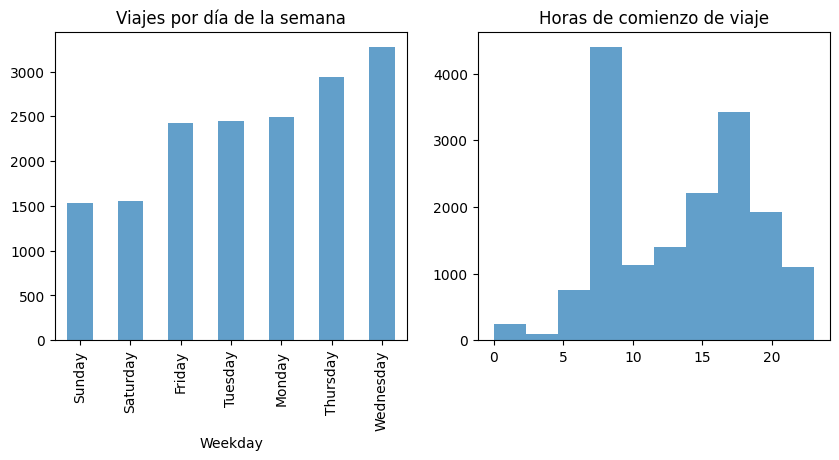

In [21]:
fig,axs= plt.subplots(1,2, figsize=(10,4))
axs[1].set_title(label="Horas de comienzo de viaje")
df_citibike.value_counts("Weekday").sort_values().plot.bar(ax=axs[0], alpha=0.7, title="Viajes por día de la semana")
df_citibike["Start Time"].dt.hour.hist(ax=axs[1], bins=10, alpha=0.7, grid=False)

**La hora a la que más viajes comienzan son las ocho:**

In [22]:
df_citibike["Start Time"].dt.hour.value_counts().head(1).to_frame()

,count
Start Time,
8,2190


In [23]:
df_citibike.value_counts(["Month", "Season"]).to_frame()

,,count
Month,Season,
3,Spring,7110
2,Winter,4963
1,Winter,4585


# 5. Geographic Analysis
### Which station pairs (start → end) appear most often?
Podemos ver facilmente que el trayecto más común es: Hamilton Park → Grove St PATH 

In [24]:
rutas = df_citibike['Start Station Name'] + " → " + df_citibike['End Station Name']
rutas.value_counts().head().to_frame()

,count
Hamilton Park → Grove St PATH,400
Morris Canal → Exchange Place,364
Dixon Mills → Grove St PATH,293
Exchange Place → Morris Canal,290
Grove St PATH → Hamilton Park,273


Para poder representar la gráfica de una forma minimamente legible, tenemos que requirir al **cuartil 95**. Estos son los principales viajes, el resto, la inmensa mayoría son muy poco significativos. Realizandose menos de cincuenta veces y muchos una sola vez.

<Axes: >

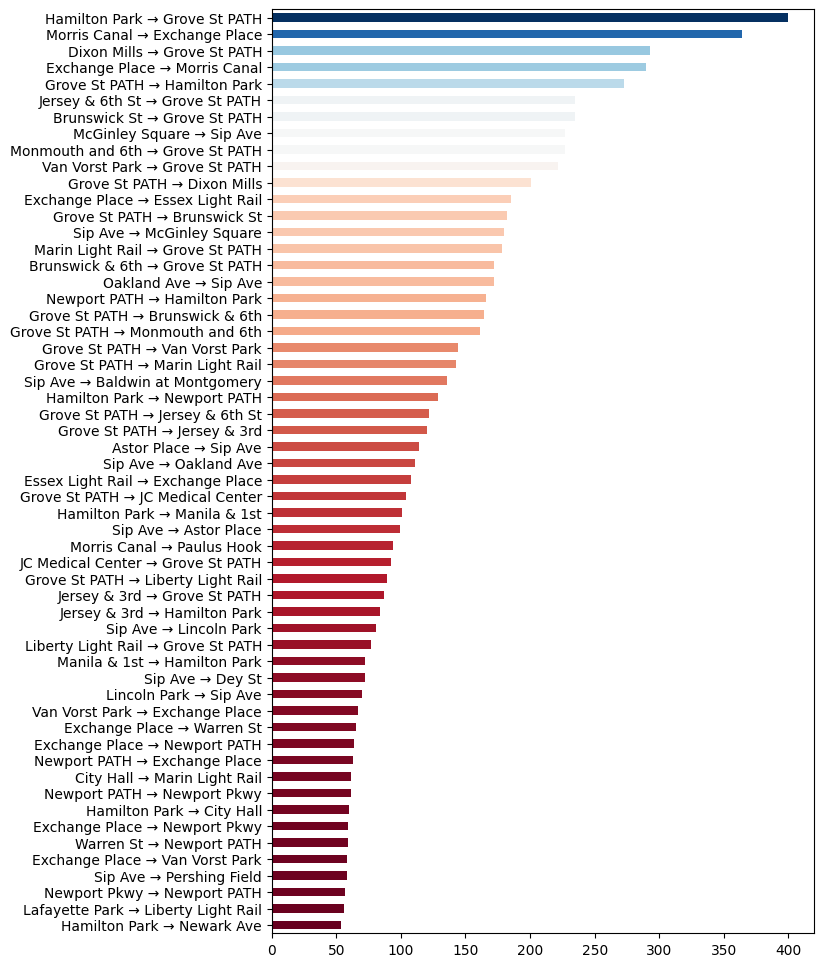

In [25]:
s=rutas.value_counts().sort_values()
s=s[s>s.quantile(.95)]
norm = matplotlib.colors.Normalize(vmin=s.min(), vmax=s.max())
colors = plt.get_cmap("RdBu")(norm(s.values))
s.plot.barh(figsize=(7, 12), color=colors)

### Are there any stations that appear only as start or only as end stations?
Filtando con vectores booleanos podemos comprobar si existen estaciones que unicamente aparecen cómo de salida o de llegada. Haciendo la suma podemos ver que **no hay ninguna estación unicamente de salida pero sí diez unicamente de llegada.**

In [26]:
only_start=~df_citibike.loc[:,"Start Station Name"].isin(df_citibike.loc[:,"End Station Name"])
only_end=~df_citibike.loc[:,"End Station Name"].isin(df_citibike.loc[:,"Start Station Name"])

In [27]:
only_start.sum(), only_end.sum()

(np.int64(0), np.int64(10))

In [28]:
df_citibike.loc[only_end, "Start Station Name"].unique()

array(['Morris Canal', 'Heights Elevator', 'Grove St PATH',
       'Newport PATH'], dtype=object)

# 6. Temperature and Duration

### Is there any visible relationship between temperature and trip duration?

El primer paso para ver relación entre la temperatura y la duración del viaje es proyectar un mapa de calor de correlaciones entre columnas. A primera vista, parece que la relación lineal entre las dos variables es casi inexistente.

In [29]:
df_citibike.loc[:,["Birth Year","Age", "Trip Duration", "Trip_Duration_in_min", "Temperature", "Month"]].corr().style.background_gradient(cmap="RdBu", vmin=-1, vmax=1)

,Birth Year,Age,Trip Duration,Trip_Duration_in_min,Temperature,Month
Birth Year,1.000000,-1.000000,0.013562,0.013327,0.000058,0.015967
Age,-1.000000,1.000000,-0.013562,-0.013327,-0.000058,-0.015967
Trip Duration,0.013562,-0.013562,1.000000,0.998735,-0.035699,-0.003195
Trip_Duration_in_min,0.013327,-0.013327,0.998735,1.000000,-0.035741,-0.003621
Temperature,0.000058,-0.000058,-0.035699,-0.035741,1.000000,0.630764
Month,0.015967,-0.015967,-0.003195,-0.003621,0.630764,1.000000


Vamos a representar las dos variables sobre un scatter para explorar relaciones no lineales.

<Axes: xlabel='Duracion', ylabel='Temperatura'>

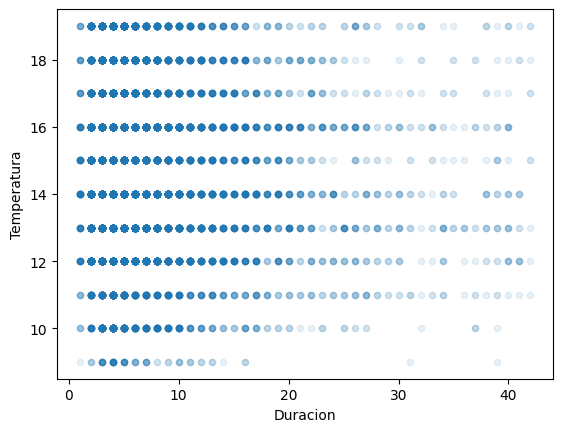

In [30]:
df_citibike.plot.scatter(x="Trip_Duration_in_min", y="Temperature", alpha=.1, xlabel="Duracion", ylabel="Temperatura")

Podemos ver en el gráfico que no existe una relación fuerte entre temperatura y duración del viaje, **la distribución es monogénea en todo el eje de la temperatura**. Para viualizarlo mejor, vamos a añadir rudido para difuminar estas formas de "grid" que vemos en los datos.

<Axes: xlabel='Duracion', ylabel='Temperatura'>

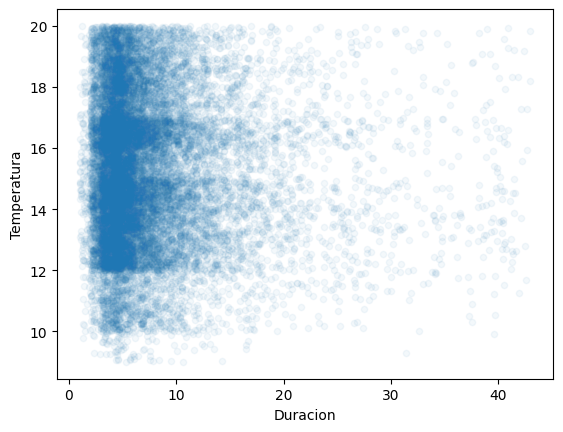

In [31]:
def jitter(df, column):
    rands=np.random.random(len(df))
    return df[column] + rands

(df_citibike.assign(
    Temperatura=lambda df:df.Temperature.where(df_citibike.Temperature == 0, jitter(df_citibike, "Temperature").clip(lower=0)),
    Duracion=lambda df:df["Trip_Duration_in_min"].where(df_citibike["Trip_Duration_in_min"] == 0, jitter(df_citibike, "Trip_Duration_in_min").clip(lower=0)))
    .plot.scatter(x="Duracion", y="Temperatura", alpha=.05))

### How does average trip duration vary by season?
Para esto simplemente encadenamos una operación de agrupación y agregamos sobre la media de la duración en minutos.

In [37]:
df_citibike.groupby("Season")["Trip_Duration_in_min"].mean().rename("Media").to_frame()

,Media
Season,
Spring,6.952321
Winter,7.120235


# 7. Summary and Interpretation
La calidad del dataset era correcta, exceptuando un valor nulo y algún outlier, que fueron fáciles de detectar y eliminar. El ejercicio nos ha empujado a pensar sobre los datos, cómo explorarlos, posibles complocaciones, cómo representarlos, etc. La tendencia más significativa, o que al menos más me ha sorprendido, es el hecho de que la temperatura no afecta el tiempo de viaje ni al uso. Igualmente, los trayectos son muy cortoss en su mayoría, de menos de diez minutos.